# Problem 3: RBF network

Firstly, let's import the existing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from utils.data_parser import data_split_train_test, prepare_datasource
from utils.utilities import compute_cost, compute_accuracy, plot_analysis, plot_full_analysis #bring these utilities helpers from A1


Then, split out the datasource into training and test data with the ratio of 8:2. Notice that the datasource is generated exactly once and is stored for later use in 2 files, training_data.csv and training_labels.csv

In [3]:
X, y = prepare_datasource()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

The spread parameters are preset as follow

In [4]:
radius_values = [0.1, 1., 2., 5., 10., 20., 30., 40., 50., 60., 70., 80., 90., 100., 120.]

Firstly, let's compute the gaussian matrix $$g_j=gaussian(d_j)=e^{\frac{-{d_j}^2}{2\sigma^2}}$$ where 
$d_j = ||X-c_j||$ and $c_j$ is each element in centers

In [5]:
def compute_gaussian_matrix(X, centers, width):
    gj = np.zeros((centers.shape[0], X.shape[0]))
    for c_idx,cj in enumerate(centers):
        for  input_idx,input in enumerate(X):
            dj = np.linalg.norm(input-cj)
            yj = np.exp(-dj**2/(2*(width**2)))
            gj[c_idx, input_idx] = yj
    return gj

Next, $g_j$ is then fed into the linear regression model with proper weights to compute the output $$Y=\sum_{j=1}^n{w_jg_j}$$

In [6]:
def compute_output(X, weights, centers, width):
    G = compute_gaussian_matrix(X, centers, width)
    Y = np.matmul(weights, G)
    return Y

We now compute the weight matrix using gaussian matrix $G$ and the targets $Y$ by the formula:

$$W = G^{+}Y$$
where $G^{+}$ is the pseudo-inverse matrix of G

In [7]:
def compute_weight(X, Y, centers, width):
    G = compute_gaussian_matrix(X, centers, width)
    W = np.matmul(Y, np.linalg.pinv(G))
    return W

## Part 1
Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all
the points in the training set as centers of the RB functions. Compare the performance results (mean square
error) as you vary the spread parameter while keeping it the same for all kernel functions. Discuss your findings.

In [8]:
all_circle_cost = []
all_circle_accuracy = []
for radius in radius_values:
    W = compute_weight(X_train, y_train, X_train, radius)
    y_test_hat = compute_output(X_test, W, X_train, radius)
    y_test_pred = np.sign(y_test_hat)
    # y_train_hat = compute_output(X_train, W, X_train, radius)
    # y_train_pred = np.sign(y_train_hat)
    cost = compute_cost(y_test_pred, y_test)
    accuracy = compute_accuracy(y_test_pred, y_test) * 100
    all_circle_cost.append(cost)
    all_circle_accuracy.append(accuracy)
    print(f"radius = {radius}   cost = {cost} testing accuracy = {accuracy}")

radius = 0.1   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 1.0   cost = 0.2696629213483146 testing accuracy = 93.25842696629213
radius = 2.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 5.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 10.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 20.0   cost = 0.0898876404494382 testing accuracy = 97.75280898876404
radius = 30.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 40.0   cost = 0.1348314606741573 testing accuracy = 96.62921348314607
radius = 50.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 60.0   cost = 0.1797752808988764 testing accuracy = 95.50561797752809
radius = 70.0   cost = 0.3146067415730337 testing accuracy = 92.13483146067416
radius = 80.0   cost = 0.7640449438202247 testing accuracy = 80.89887640449437
radius = 90.0   cost = 0.7640449438202247 testing accura

## Part 2
Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches:

a) Randomly select the centers from the input data.
b) Use K-Means algorithm to find the centers. You can use a Kmeans function defined in sklearn (https://scikitlearn.
org/stable/modules/generated/sklearn.cluster.KMeans.html) or create your own.

## 2.a. Randomly pick 150 centers 

In [9]:
selected_centers_indices = np.random.choice(X_train.shape[0], size=150, replace=False)
selected_centers = X_train[selected_centers_indices, :]


Then, run the whole thing again given the above centers:

In [10]:
random_circle_cost = []
random_circle_accuracy = []
for radius in radius_values:
    W = compute_weight(X_train, y_train, selected_centers, radius)
    y_hat = compute_output(X_test, W, selected_centers, radius)
    y_pred = np.sign(y_hat)
    cost = compute_cost(y_pred, y_test)
    accuracy = compute_accuracy(y_pred, y_test) * 100
    random_circle_cost.append(cost)
    random_circle_accuracy.append(accuracy)
    print(f"radius = {radius}   cost = {cost}   testing accuracy = {accuracy}")

radius = 0.1   cost = 0.2247191011235955   testing accuracy = 94.3820224719101
radius = 1.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 2.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 5.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 10.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 20.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 30.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 40.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 50.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 60.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 70.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 80.0   cost = 0.7640449438202247   testing accuracy = 80.89887640449437
radius = 90.0   cost = 0.76404494

## 2.b. Use K-Means algorithm for selecting 150 centers 

In [11]:
kmeans = KMeans(n_clusters=150)
kmeans.fit(X_train)
kmean_centers = kmeans.cluster_centers_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Finally, execute the program with the centers given by KMeans clusters

In [12]:
kmeans_circle_cost = []
kmeans_circle_accuracy = []
for radius in radius_values:
    W = compute_weight(X_train, y_train, kmean_centers, radius)
    y_hat = compute_output(X_test, W, kmean_centers, radius)
    y_pred = np.sign(y_hat)
    cost = compute_cost(y_pred, y_test)
    accuracy = compute_accuracy(y_pred, y_test) * 100
    kmeans_circle_cost.append(cost)
    kmeans_circle_accuracy.append(accuracy)
    print(f"radius = {radius}   cost = {cost}   testing accuracy = {accuracy}")

radius = 0.1   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 1.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 2.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 5.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 10.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 20.0   cost = 0.0898876404494382   testing accuracy = 97.75280898876404
radius = 30.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 40.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 50.0   cost = 0.1348314606741573   testing accuracy = 96.62921348314607
radius = 60.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 70.0   cost = 0.1797752808988764   testing accuracy = 95.50561797752809
radius = 80.0   cost = 0.7640449438202247   testing accuracy = 80.89887640449437
radius = 90.0   cost = 0.7640449

## Analysis
In the analysis section, we will discuss about the performance for each approach, including the cost and the accuracy of the testing data. 
### a. Full selection:
The diagrams of cost and accuracy of full-selection method are described below:


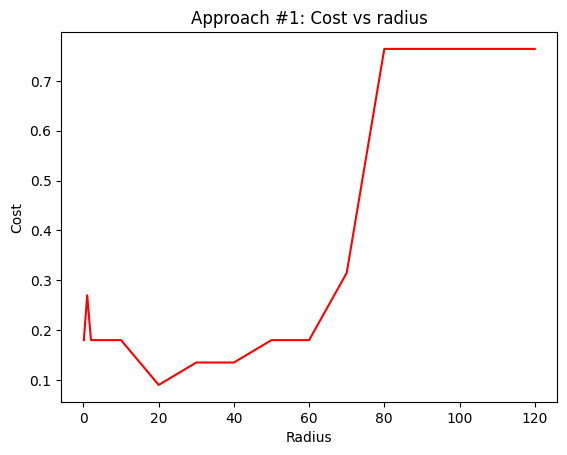

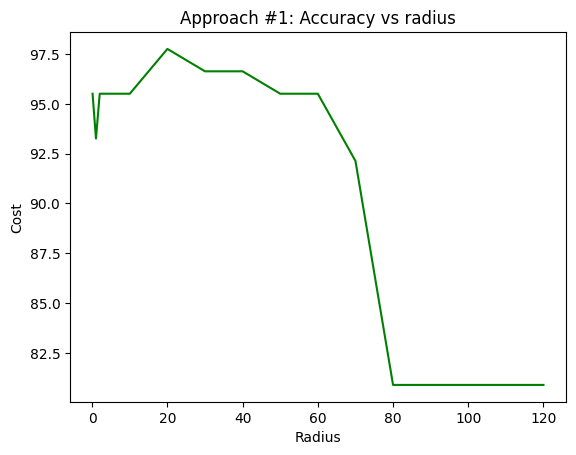

In [13]:
plot_analysis("Approach #1: Cost vs radius", "Cost", radius_values, all_circle_cost, 'r-', "Radius" )
plot_analysis("Approach #1: Accuracy vs radius", "Cost", radius_values, all_circle_accuracy, 'g-', "Radius" )

As we can see from the diagrams, the accuracy of this method reaches a peak with $radius=20$, at around 98%, whereas the cost given this radius hits a low of about 0.1. The bigger the radius is, the less accurate the method becomes, while its cost increases significantly from $radius=60$. From $radius=80$ onwards, both Cost and Accuracy remain unchanged.

### b. Randomly select 150 centers
Similarly, the line charts are illustrated as follow

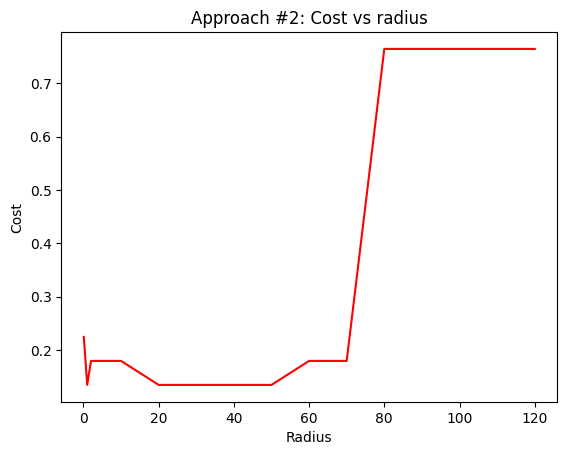

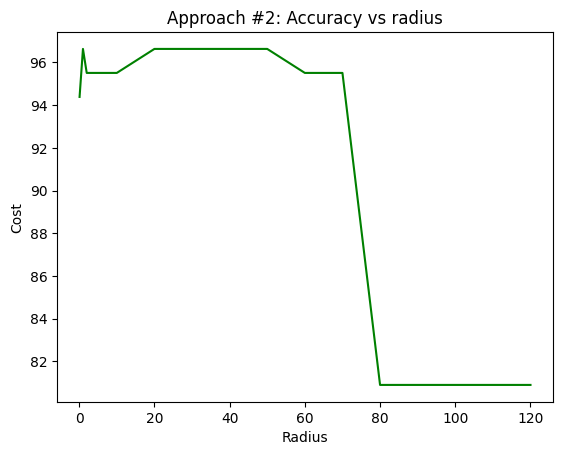

In [14]:
plot_analysis("Approach #2: Cost vs radius", "Cost", radius_values, random_circle_cost, 'r-', "Radius" )
plot_analysis("Approach #2: Accuracy vs radius", "Cost", radius_values, random_circle_accuracy, 'g-', "Radius" )

The same pattern as the approach #1 can be seen in the approach #2, in which we achieve the highest accuracy in the range of $radius$ from 20 to 50 (around 97%), while their costs hit the lowest point at around 0.1, and both criteria stabilize from $radius=80$

### c. 150 centers with Kmeans 
These diagrams show the cost and accuracy given 150 centers selected by Kmeans

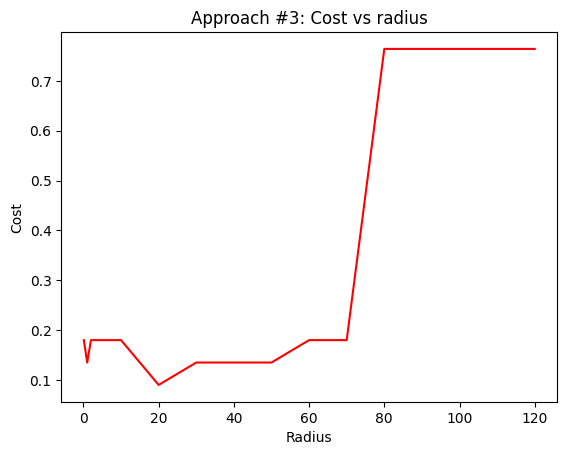

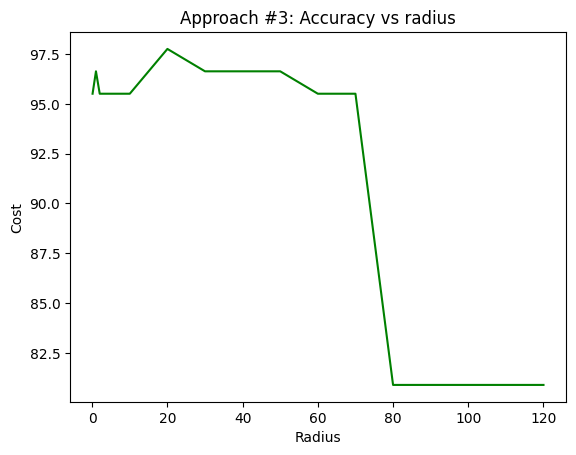

In [15]:
plot_analysis("Approach #3: Cost vs radius", "Cost", radius_values, kmeans_circle_cost, 'r-', "Radius" )
plot_analysis("Approach #3: Accuracy vs radius", "Cost", radius_values, kmeans_circle_accuracy, 'g-', "Radius" )

Similarly to the approach #1, the best analysis is achieved at $radius=20$, while the network becomes less accurate and experiences higher cost from $radius=70$. 

## Conclusion
Let put all diagrams together to compare their performance

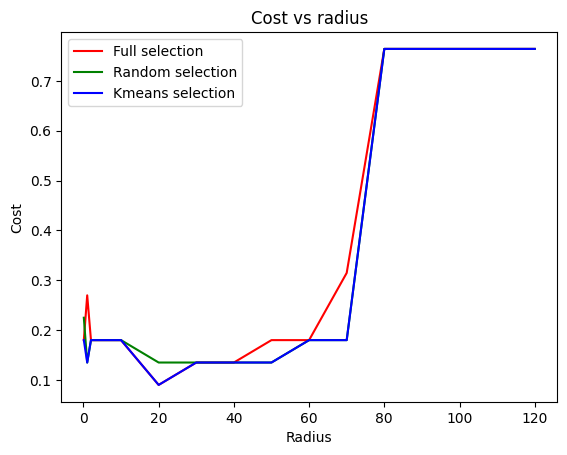

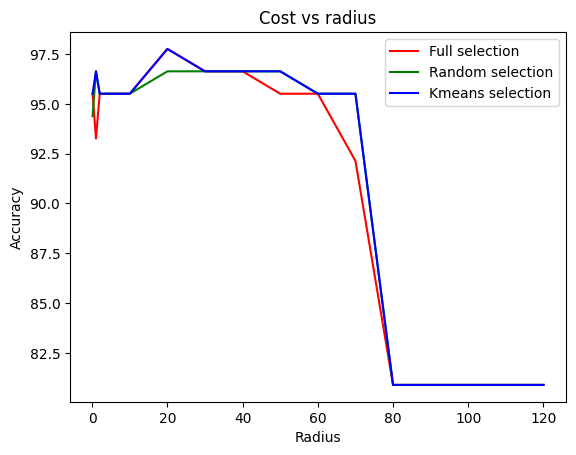

In [17]:
plot_full_analysis("Cost vs radius", "Cost", radius_values,  all_circle_cost, random_circle_cost, kmeans_circle_cost, 'red', 'green', 'blue')
plot_full_analysis("Cost vs radius", "Accuracy", radius_values,  all_circle_accuracy, random_circle_accuracy, kmeans_circle_accuracy, 'red', 'green', 'blue')